# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


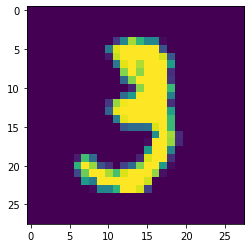

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.1))

model.add(Convolution2D(16,3,3, activation='relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(32,3,3 , activation = 'relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64,3,3 , activation = 'relu'))
model.add(Dropout(0.1))

#adding maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(8,1,1))

model.add(Convolution2D(16,3,3, activation='relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to

In [60]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
dropout_17 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
dropout_19 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 20, 20, 64)      

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [62]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.2009 - acc: 0.9361
Epoch 2/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0741 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0561 - acc: 0.9828
Epoch 4/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0469 - acc: 0.9848
Epoch 5/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0406 - acc: 0.9871
Epoch 6/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.0374 - acc: 0.9880
Epoch 7/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.0336 - acc: 0.9892
Epoch 8/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.0298 - acc: 0.9903
Epoch 9/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0278 - acc: 0.9913
Epoch 10/10
60000/60000 [==============================] - 16s 270us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [64]:
print(score)

[0.025798536649974994, 0.9911]


In [0]:
y_pred = model.predict(X_test)

In [66]:
print(y_pred[:9])
print(y_test[:9])

[[1.12210491e-10 2.30278960e-08 3.13659108e-08 1.00354832e-07
  2.46901089e-12 1.86812565e-10 9.62620710e-20 9.99999881e-01
  8.84004675e-12 1.35987355e-08]
 [2.23485856e-07 2.34040908e-06 9.99951720e-01 1.69057941e-08
  3.43703503e-11 6.39532663e-11 8.09569514e-08 2.03847134e-10
  4.55469162e-05 5.51913376e-11]
 [3.03706482e-09 9.99999046e-01 8.40947436e-08 7.33541960e-12
  6.16764567e-07 1.22281945e-08 7.70449216e-09 1.66807524e-07
  1.60883107e-09 6.04177997e-09]
 [9.99967575e-01 2.73937058e-12 2.55750166e-07 1.85100560e-10
  3.30459854e-10 6.92805058e-09 2.67784508e-05 3.23294955e-08
  2.04983994e-08 5.30498801e-06]
 [1.95372798e-12 5.93775917e-10 4.18133261e-09 2.80879598e-15
  9.99999166e-01 4.19772940e-13 3.28239574e-10 3.84176996e-11
  1.55993063e-09 8.02045633e-07]
 [1.54474877e-09 9.99997973e-01 1.44909521e-07 5.61493723e-13
  1.77393599e-06 1.22617838e-09 1.82836346e-09 1.53328159e-07
  1.40864664e-09 1.26486255e-09]
 [1.40311238e-13 3.82391875e-07 1.61097432e-06 3.69807917e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored